### Core Prediction Question
*Develop a predictive model to estimate the water Nitrate levels of rivers and lakes based on parameters like features like CO2 levels, turbidity, dissolved oxygen, and contaminant levels.*

Authors: Nidhi Nayak, Vishali Kirthi Vallioor
ENERES 131 Final Project

#### Reading In Our Data Sets

In [1]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

df = pd.read_csv("final_data/water_quality.csv").drop("Unnamed: 0", axis = 1)
df.head()

/tmp/ipykernel_330/3707996996.py:8: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("final_data/water_quality.csv").drop("Unnamed: 0", axis = 1)


,ActivityIdentifier,"Acidity, (H+)",Ammonia and ammonium,Arsenic,Barium,Barometric pressure,Bed sediment particle size,Bedload sediment flux,Bedload sediment particle size,Boron,...,"Temperature, air","Temperature, water",Total volatile solids,Turbidity,pH,ProjectIdentifier,ActivityStartDate,ActivityStartTime/Time_PST,LongitudeMeasure,LatitudeMeasure
0,11NPSWRD_WQX-PRSF_WQ_DF1_20100120_F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.0,NaN,NaN,NaN,NaN,PRSF_WQ,2010-01-20,NaN,-122.47117,37.80032
1,11NPSWRD_WQX-PRSF_WQ_DF1_20100120_F^01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.5,NaN,NaN,6.98,PRSF_WQ,2010-01-20,NaN,-122.47117,37.80032
2,11NPSWRD_WQX-PRSF_WQ_DF1_20100120_F^02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,13.1,NaN,PRSF_WQ,2010-01-20,NaN,-122.47117,37.80032
3,11NPSWRD_WQX-PRSF_WQ_DF1_20100120_L^01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,PRSF_WQ,2010-01-20,NaN,-122.47117,37.80032
4,11NPSWRD_WQX-PRSF_WQ_DF1_20100218_F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0,NaN,NaN,NaN,NaN,PRSF_WQ,2010-02-18,NaN,-122.47117,37.80032


In [2]:
#printing the different characteristic names to identify necessary ones for pH level predictions
df.columns.unique()

Index(['ActivityIdentifier', 'Acidity, (H+)', 'Ammonia and ammonium',
       'Arsenic', 'Barium', 'Barometric pressure',
       'Bed sediment particle size', 'Bedload sediment flux',
       'Bedload sediment particle size', 'Boron', 'Calcium', 'Carbon dioxide',
       'Chloride', 'Depth', 'Fluoride', 'Hardness, Ca, Mg', 'Height, gage',
       'Magnesium', 'Nitrate', 'Nitrite',
       'Nitrogen, mixed forms (NH3), (NH4), organic, (NO2) and (NO3)',
       'Number of sampling points', 'Organic carbon', 'Orthophosphate',
       'Oxygen', 'Phosphorus', 'Potassium', 'Refractive Index (RI)', 'Silica',
       'Sodium', 'Specific conductance', 'Stream flow, instantaneous',
       'Stream width measure', 'Sulfate',
       'Suspended Sediment Concentration (SSC)',
       'Suspended Sediment Discharge', 'Temperature, air',
       'Temperature, water', 'Total volatile solids', 'Turbidity', 'pH',
       'ProjectIdentifier', 'ActivityStartDate', 'ActivityStartTime/Time_PST',
       'LongitudeMeasure'

In [3]:
#identifying relevant features to predict pH levels (after doing research)
relevant_sodium_characteristics = ['Turbidity', 'Calcium', 'Magnesium', 'Carbon dioxide', 'Sodium', 'Hardness, Ca, Mg', 
                                   'Organic carbon', 'Silica', 'Chloride', 'Arsenic']
filtered_sodium_dataframe = df[relevant_sodium_characteristics]
print(filtered_sodium_dataframe)

       Turbidity  Calcium  Magnesium  Carbon dioxide  Sodium  \
0            NaN      NaN        NaN             NaN     NaN   
1            NaN      NaN        NaN             NaN     NaN   
2           13.1      NaN        NaN             NaN     NaN   
3            NaN      NaN        NaN             NaN     NaN   
4            NaN      NaN        NaN             NaN     NaN   
...          ...      ...        ...             ...     ...   
33776        NaN      NaN        NaN             NaN     NaN   
33777        NaN      NaN        NaN             NaN     NaN   
33778        NaN      NaN        NaN             NaN     NaN   
33779        NaN      NaN        NaN             NaN     NaN   
33780        NaN      NaN        NaN             NaN     NaN   

       Hardness, Ca, Mg  Organic carbon  Silica  Chloride  Arsenic  
0                   NaN             NaN     NaN       NaN      NaN  
1                   NaN             NaN     NaN       NaN      NaN  
2                   NaN 

In [4]:
print("Basic Info about the Dataset: ")
print(filtered_sodium_dataframe.info())

print("\nNaN Count In Water Potability Dataset: ")
print(filtered_sodium_dataframe.isnull().sum())

print("\nDataset Described (Stats): ")
print(filtered_sodium_dataframe.describe())

print("\nSum of null values in columns: ")
print(filtered_sodium_dataframe.isnull().sum())

Basic Info about the Dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33781 entries, 0 to 33780
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Turbidity         3073 non-null   float64
 1   Calcium           1156 non-null   float64
 2   Magnesium         1169 non-null   float64
 3   Carbon dioxide    91 non-null     float64
 4   Sodium            1145 non-null   float64
 5   Hardness, Ca, Mg  306 non-null    float64
 6   Organic carbon    1662 non-null   float64
 7   Silica            403 non-null    float64
 8   Chloride          3095 non-null   float64
 9   Arsenic           1133 non-null   float64
dtypes: float64(10)
memory usage: 2.6 MB
None

NaN Count In Water Potability Dataset: 
Turbidity           30708
Calcium             32625
Magnesium           32612
Carbon dioxide      33690
Sodium              32636
Hardness, Ca, Mg    33475
Organic carbon      32119
Silica              33378
C

In [5]:
#replacing null values with the mean value for EDA
filtered_sodium_dataframe_nan_vals = filtered_sodium_dataframe.fillna(filtered_sodium_dataframe.mean())

### EDA

#### Correlation of All Relevant Variables

Text(0.5, 1.0, 'Correlation Matrix Between Relevant Features')

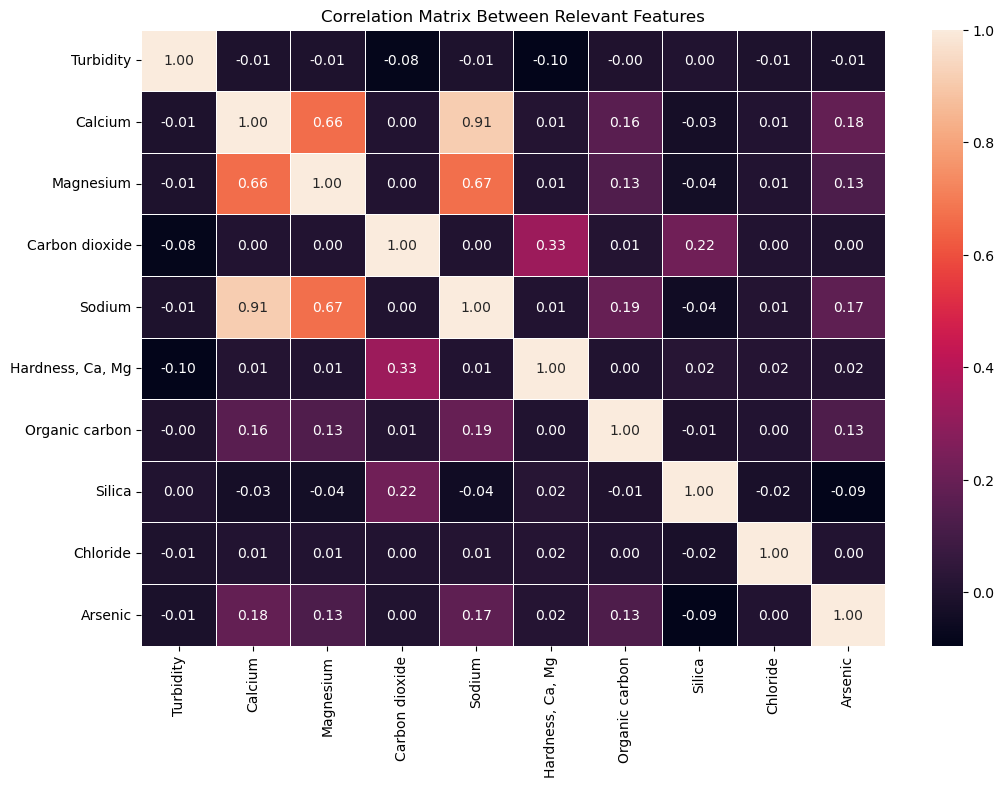

In [6]:
plt.figure(figsize=(12, 8))
corr_matrix = filtered_sodium_dataframe_nan_vals.corr()
sns.heatmap(corr_matrix, annot=True, cmap='rocket', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Between Relevant Features')

### Exploring Sodium Relationships In Depth

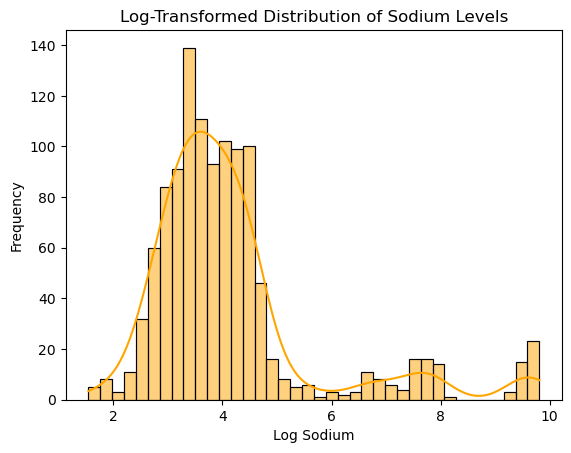

In [7]:
dropped_nan_sodium = filtered_sodium_dataframe['Sodium'].dropna()
filtered_sodium_log = np.log1p(dropped_nan_sodium)

sns.histplot(filtered_sodium_log, kde=True, color='orange')
plt.title('Log-Transformed Distribution of Sodium Levels')
plt.xlabel('Log Sodium')
plt.ylabel('Frequency')
plt.show()

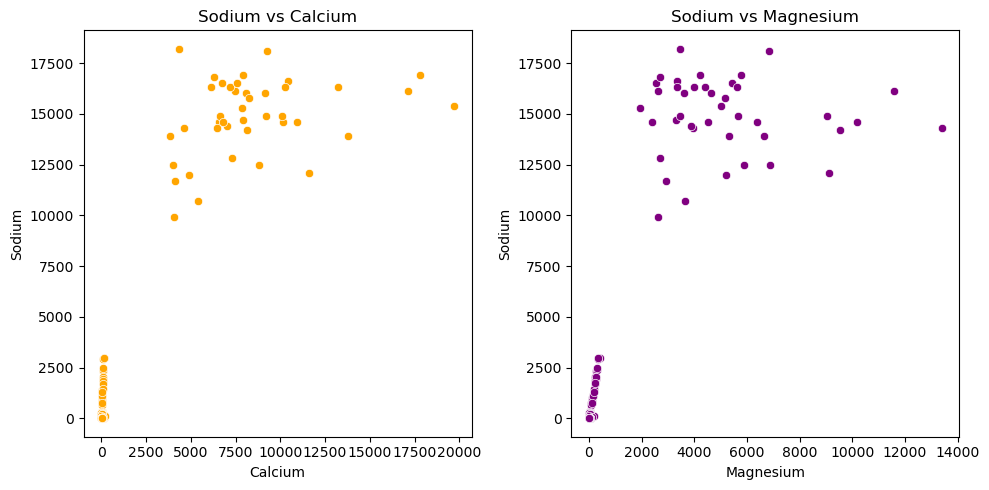

In [8]:
plt.figure(figsize=(10, 5))

dropped_nan_sodium_calcium = filtered_sodium_dataframe[['Sodium', 'Calcium']].dropna()
plt.subplot(1, 2, 1)
sns.scatterplot(data=dropped_nan_sodium_calcium, x='Calcium', y='Sodium', color='orange')
plt.title('Sodium vs Calcium')

dropped_nan_sodium_magnesium = filtered_sodium_dataframe[['Sodium', 'Magnesium']].dropna()
plt.subplot(1, 2, 2)
sns.scatterplot(data=dropped_nan_sodium_magnesium, x='Magnesium', y='Sodium', color='purple')
plt.title('Sodium vs Magnesium')

plt.tight_layout()
plt.show()

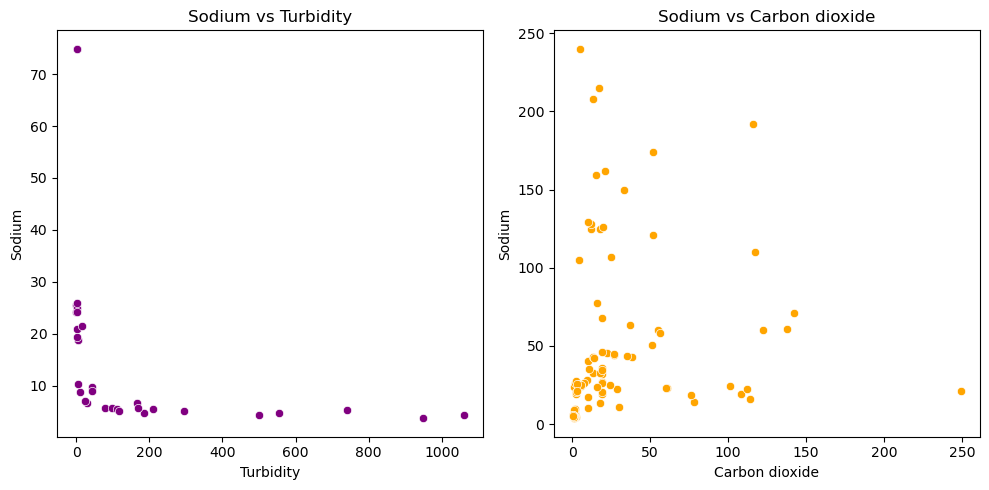

In [9]:
plt.figure(figsize=(10, 5))

dropped_nan_sodium_turbidity = filtered_sodium_dataframe[['Sodium', 'Turbidity']].dropna()
plt.subplot(1, 2, 1)
sns.scatterplot(data=dropped_nan_sodium_turbidity, x='Turbidity', y='Sodium', color='purple')
plt.title('Sodium vs Turbidity')

dropped_nan_sodium_carbon_dioxide = filtered_sodium_dataframe[['Sodium', 'Carbon dioxide']].dropna()
plt.subplot(1, 2, 2)
sns.scatterplot(data=dropped_nan_sodium_carbon_dioxide, x='Carbon dioxide', y='Sodium', color='orange')
plt.title('Sodium vs Carbon dioxide')

plt.tight_layout()
plt.show()

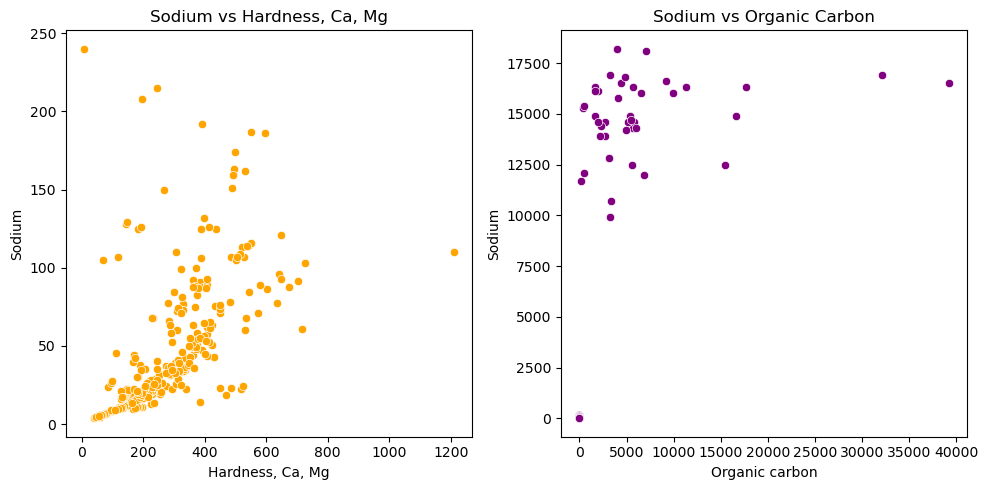

In [10]:
plt.figure(figsize=(10, 5))

dropped_nan_sodium_hardness = filtered_sodium_dataframe[['Sodium', 'Hardness, Ca, Mg']].dropna()
plt.subplot(1, 2, 1)
sns.scatterplot(data=dropped_nan_sodium_hardness, x='Hardness, Ca, Mg', y='Sodium', color='orange')
plt.title('Sodium vs Hardness, Ca, Mg')

dropped_nan_sodium_organic_carbon = filtered_sodium_dataframe[['Sodium', 'Organic carbon']].dropna()
plt.subplot(1, 2, 2)
sns.scatterplot(data=dropped_nan_sodium_organic_carbon, x='Organic carbon', y='Sodium', color='purple')
plt.title('Sodium vs Organic Carbon')

plt.tight_layout()
plt.show()

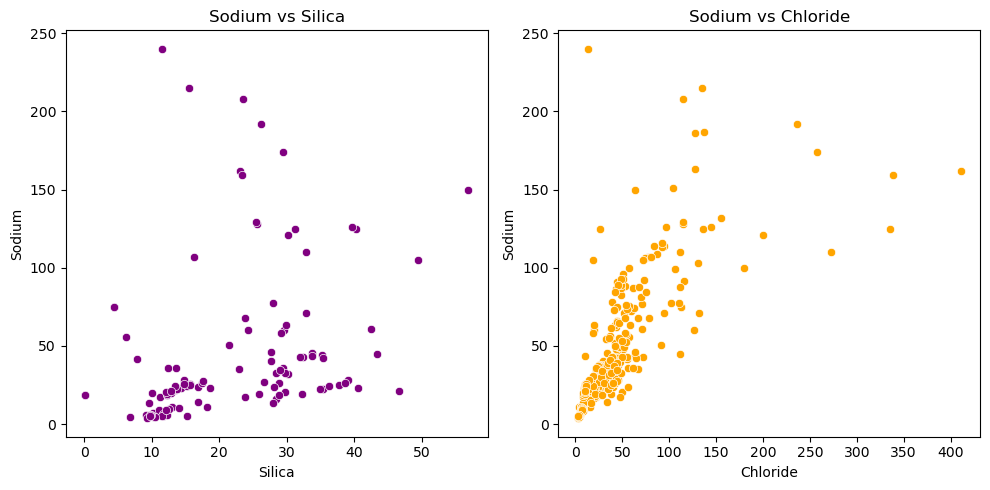

In [11]:
plt.figure(figsize=(10, 5))

dropped_nan_sodium_silica = filtered_sodium_dataframe[['Sodium', 'Silica']].dropna()
plt.subplot(1, 2, 1)
sns.scatterplot(data=dropped_nan_sodium_silica, x='Silica', y='Sodium', color='purple')
plt.title('Sodium vs Silica')

dropped_nan_sodium_chloride = filtered_sodium_dataframe[['Sodium', 'Chloride']].dropna()
plt.subplot(1, 2, 2)
sns.scatterplot(data=dropped_nan_sodium_chloride, x='Chloride', y='Sodium', color='orange')
plt.title('Sodium vs Chloride')

plt.tight_layout()
plt.show()

Vishali

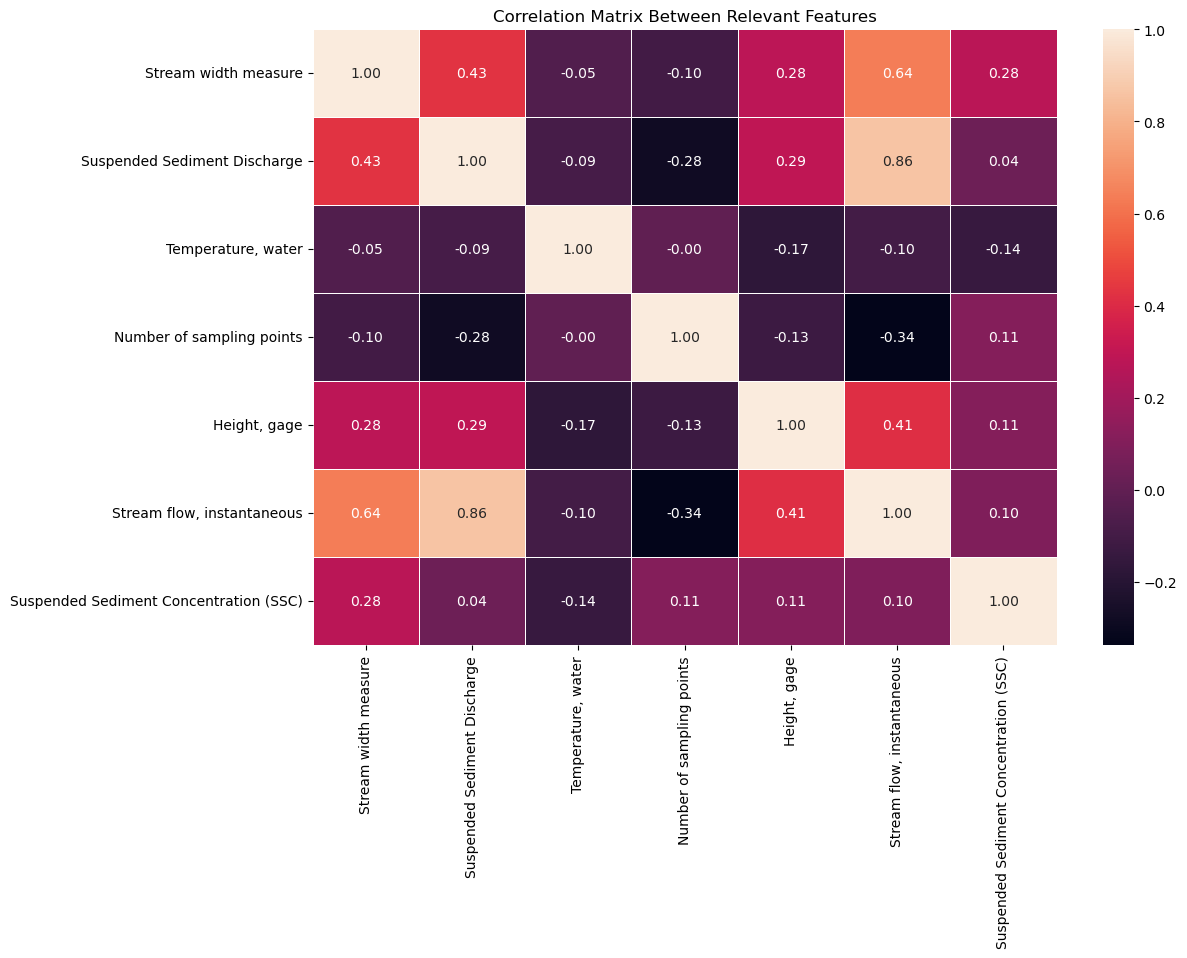

In [12]:
df_specific = df[['Stream width measure', 'Suspended Sediment Discharge', 'Temperature, water', 'Number of sampling points', 'Height, gage', 'Stream flow, instantaneous', 'Suspended Sediment Concentration (SSC)']].dropna(axis = 0)

plt.figure(figsize=(12, 8))
corr_matrix = df_specific.corr()
sns.heatmap(corr_matrix, annot=True, cmap='rocket', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Between Relevant Features')
plt.show()

In [13]:
import pandas as pd
import itertools
from collections import Counter

# Load your dataset into `df`
# Example: df = pd.read_csv("your_dataset.csv")

# Exclude irrelevant columns (like identifiers, dates, etc.)
columns_to_exclude = ["ActivityIdentifier", "ProjectIdentifier", 
                      "ActivityStartDate", "ActivityStartTime/Time_PST", 
                      "LongitudeMeasure", "LatitudeMeasure"]
df_relevant = df.drop(columns=columns_to_exclude, errors='ignore')

# Step 1: Convert data to binary (1 = measured, 0 = not measured)
binary_matrix = df_relevant.notna().astype(int)

# Step 2: Filter rows with at least 2 or 3 measurements (set threshold)
min_measurements = 3
filtered_matrix = binary_matrix[binary_matrix.sum(axis=1) >= min_measurements]

# Step 3: Count the frequency of trait combinations
# Create a frozenset for each row's non-NaN columns and count occurrences
trait_combinations = filtered_matrix.apply(
    lambda row: frozenset(row[row == 1].index), axis=1
)
combination_counts = Counter(trait_combinations)

# Step 4: Filter combinations to include only those with the specified traits
required_traits = {"pH", "Specific conductance", "Nitrate", "Turbidity"}
filtered_combinations = {
    combo: count for combo, count in combination_counts.items() if required_traits.intersection(combo)
}

# Step 5: Sort and display the most common combinations
most_common_combinations = Counter(filtered_combinations).most_common(20)  # Top 20 combinations

print("Most Common Water Quality Trait Combinations Including Any of pH, Specific Conductance, Nitrate, and Turbidity:")
for combo, count in most_common_combinations:
    print(f"Traits: {list(combo)}, Count: {count}")


Most Common Water Quality Trait Combinations Including Any of pH, Specific Conductance, Nitrate, and Turbidity:
Traits: ['pH', 'Specific conductance', 'Temperature, water'], Count: 3660
Traits: ['pH', 'Specific conductance', 'Oxygen', 'Temperature, water'], Count: 974
Traits: ['Nitrate', 'Sulfate', 'Phosphorus'], Count: 727
Traits: ['Nitrate', 'Sulfate', 'Chloride'], Count: 556
Traits: ['pH', 'Specific conductance', 'Height, gage', 'Temperature, water'], Count: 275
Traits: ['Number of sampling points', 'Suspended Sediment Concentration (SSC)', 'Turbidity', 'Suspended Sediment Discharge', 'Stream flow, instantaneous', 'Height, gage', 'Temperature, water', 'Stream width measure'], Count: 246
Traits: ['Orthophosphate', 'Silica', 'Nitrite', 'Nitrogen, mixed forms (NH3), (NH4), organic, (NO2) and (NO3)', 'Phosphorus', 'Nitrate', 'Ammonia and ammonium'], Count: 103
Traits: ['Orthophosphate', 'Nitrite', 'Nitrogen, mixed forms (NH3), (NH4), organic, (NO2) and (NO3)', 'Nitrate', 'Ammonia and am

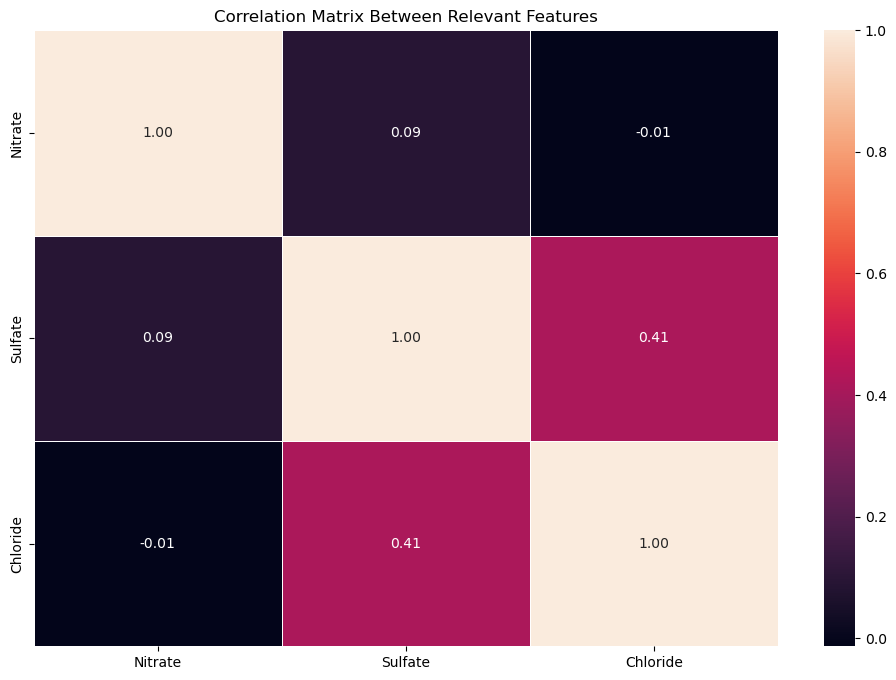

In [14]:
df_specific = df[['Nitrate', 'Sulfate', 'Chloride']].dropna(axis = 0)

plt.figure(figsize=(12, 8))
corr_matrix = df_specific.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix Between Relevant Features')
plt.show()

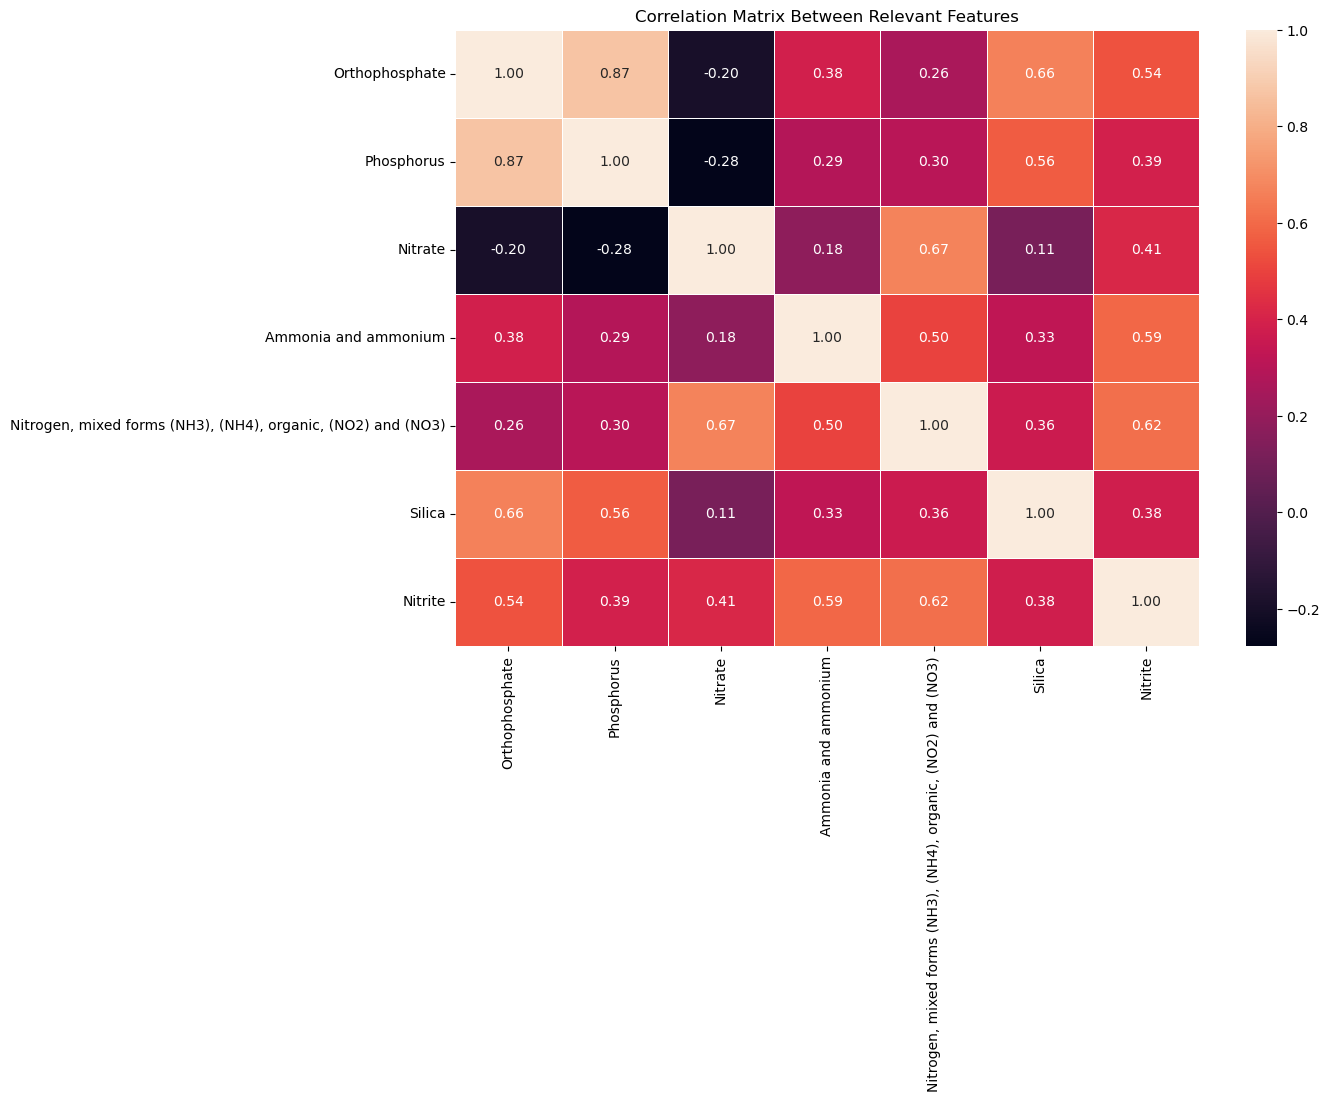

In [15]:
df_specific_big = df[['Orthophosphate', 'Phosphorus', 'Nitrate', 'Ammonia and ammonium', 'Nitrogen, mixed forms (NH3), (NH4), organic, (NO2) and (NO3)', 'Silica', 'Nitrite']].dropna(axis = 0)

plt.figure(figsize=(12, 8))
corr_matrix = df_specific_big.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix Between Relevant Features')
plt.show()

In [16]:
df_specific_big = df[['ActivityIdentifier', 'Orthophosphate', 'Phosphorus', 'Nitrate', 'Ammonia and ammonium', 'Nitrogen, mixed forms (NH3), (NH4), organic, (NO2) and (NO3)', 'Silica', 'Nitrite']].dropna(axis = 0)
df_specific_big = df_specific_big.merge(df[['ActivityIdentifier', 'ActivityStartDate', 'ActivityStartTime/Time_PST', 'LongitudeMeasure', 'LatitudeMeasure']], on = "ActivityIdentifier")
df_specific_big

,ActivityIdentifier,Orthophosphate,Phosphorus,Nitrate,Ammonia and ammonium,"Nitrogen, mixed forms (NH3), (NH4), organic, (NO2) and (NO3)",Silica,Nitrite,ActivityStartDate,ActivityStartTime/Time_PST,LongitudeMeasure,LatitudeMeasure
0,nwisca.01.02202730,0.041864,0.000195,0.831105,0.064250,0.930,1.22,0.032001,2022-03-25,NaN,-122.316300,37.656639
1,nwisca.01.02202731,0.052080,0.000180,0.796104,0.059170,0.680,1.11,0.027144,2022-03-25,NaN,-122.264500,37.655600
2,nwisca.01.02203319,0.077294,0.000095,0.862250,0.045075,0.380,0.88,0.031001,2022-04-19,NaN,-122.316300,37.656639
3,nwisca.01.02203320,0.079109,0.000098,0.872964,0.015240,0.370,0.68,0.021787,2022-04-19,NaN,-122.264500,37.655600
4,nwisca.01.02203323,0.097074,0.000127,1.328626,0.050155,0.580,1.24,0.048931,2022-04-19,NaN,-122.283800,37.611119
...,...,...,...,...,...,...,...,...,...,...,...,...
170,nwisca.01.02400124,0.296830,0.000288,1.191477,0.175220,0.785,8.19,0.098862,2023-10-17,NaN,-122.156000,37.566969
171,nwisca.01.02400126,0.280680,0.000263,1.104902,0.180300,0.805,7.70,0.107576,2023-10-17,NaN,-122.174231,37.532714
172,nwisca.01.02400128,0.286114,0.000291,1.304339,0.153255,0.795,7.83,0.095004,2023-10-17,NaN,-122.135900,37.534300
173,nwisca.01.02400129,0.297819,0.000290,1.457917,0.153255,0.835,8.11,0.112434,2023-10-17,NaN,-122.120519,37.504104


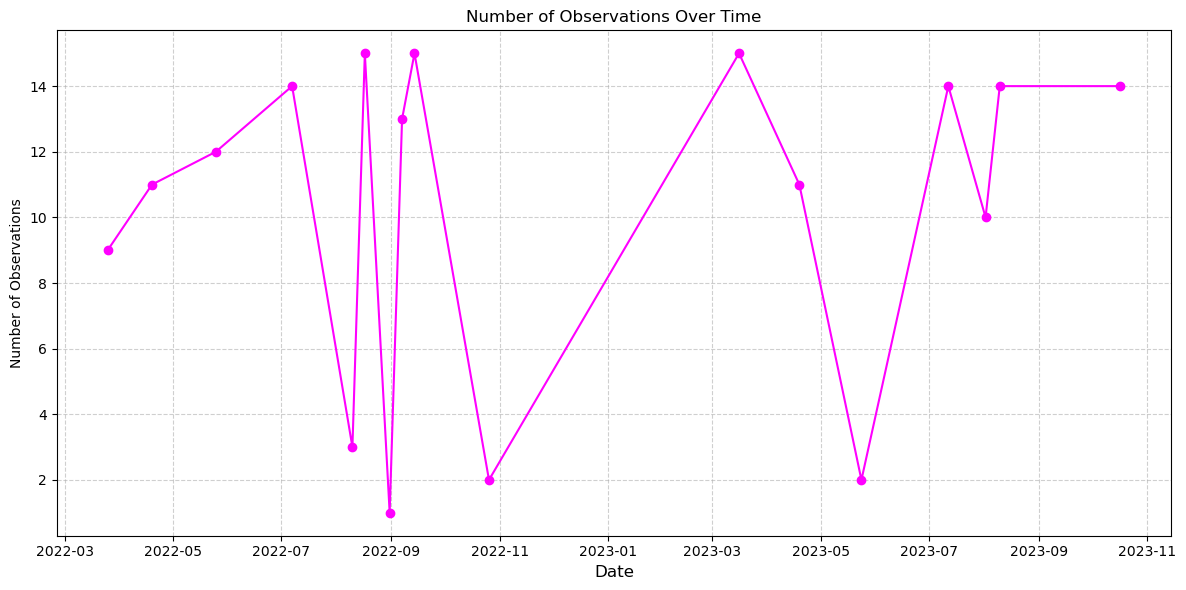

In [17]:
df_specific_big['ActivityStartDate'] = pd.to_datetime(df_specific_big['ActivityStartDate'], errors='coerce')

df_specific_big = df_specific_big.dropna(subset=['ActivityStartDate'])

date_counts = df_specific_big.groupby('ActivityStartDate').size()

plt.figure(figsize=(12, 6))
plt.plot(date_counts.index, date_counts.values, marker='o', linestyle='-', color='magenta')
plt.title('Number of Observations Over Time')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Observations')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [18]:
# import geopandas as gpd
# import pandas as pd
# import matplotlib.pyplot as plt

# ca_counties = gpd.read_file("ca_counties")

# if ca_counties.crs is None:
#     ca_counties.set_crs(epsg=4326, inplace=True)  # Default to WGS 84


# geometry = gpd.points_from_xy(df_specific_big['LongitudeMeasure'], df_specific_big['LatitudeMeasure'])
# gdf_activities = gpd.GeoDataFrame(df_specific_big, geometry=geometry)

# gdf_activities.set_crs(epsg=4326, inplace=True)  # WGS 84 (latitude/longitude)

# common_crs = ca_counties.crs  # Use the CRS of the shapefile
# gdf_activities = gdf_activities.to_crs(common_crs)

# fig, ax = plt.subplots(1, 1, figsize=(12, 10))
# ca_counties.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.7)
# gdf_activities.plot(ax=ax, color='blue', markersize=10, alpha=0.8, label='Activities')

# plt.title('Water Quality Activities in California', fontsize=16)
# plt.legend(loc='upper right')
# plt.xlabel('Longitude', fontsize=12)
# plt.ylabel('Latitude', fontsize=12)
# plt.xlim(-13800000, -13400000)
# plt.ylim(4200000, 4800000)

# plt.tight_layout()
# plt.show()


### Performing Regularization on the Big Dataset to find Important Features among the water minerals

'Orthophosphate', 'Phosphorus', 'Nitrate', 'Ammonia and ammonium', 'Nitrogen, mixed forms (NH3), (NH4), organic, (NO2) and (NO3)', 'Silica', 'Nitrite'

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

In [20]:
def get_Xy(df, cols_to_drop, y_col, test_size, random_state):
    """
    Function author: Vishali Vallioor, wrote for HW 8.

    Objective: This function returns four dataframes containing the testing and training X and y values used in specific case.
    Input:
        - df: a Pandas dataframe with all of the fields in the land-use regression dataset; 
        - cols_to_drop: a list of the names (strings) of the columns to drop from df in order to obtain the feature variables.
        - y_col: a column name (as a string) of df that represents the response variable
        - test_size: a float between 0 and 1 indicating the fraction of the data to include in the test split
        - random_state, an integer: used to define the random state
    Returns: X_train, X_test, y_train, y_test, four dataframes containing the training and testing subsets of the 
    feature matrix X and response matrix y
    """
    
    X = df.drop(columns = cols_to_drop)
    y = df[y_col]  
    
    scaler = StandardScaler()
    scaler.fit(X) 
    X_stnd = scaler.transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_stnd, y, test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train, y_test

In [21]:
df_later_predictions = df_specific_big.iloc[135:]
df_specific_big = df_specific_big.iloc[:135]

In [22]:
df_specific_big = df_specific_big.sort_values(by=['LongitudeMeasure', 'LatitudeMeasure', 'ActivityStartDate'])

df_specific_big['Previous_Nitrogen'] = df_specific_big.groupby(['LongitudeMeasure', 'LatitudeMeasure'])[
    'Nitrogen, mixed forms (NH3), (NH4), organic, (NO2) and (NO3)'
].shift(1)

df_specific_big['Previous_Orthophosphate'] = df_specific_big.groupby(['LongitudeMeasure', 'LatitudeMeasure'])[
    'Orthophosphate'
].shift(1)

df_specific_big['Previous_Phosphorus'] = df_specific_big.groupby(['LongitudeMeasure', 'LatitudeMeasure'])[
    'Phosphorus'
].shift(1)

df_specific_big['Previous_Ammonia and ammonium'] = df_specific_big.groupby(['LongitudeMeasure', 'LatitudeMeasure'])[
    'Ammonia and ammonium'
].shift(1)

df_specific_big['Previous_Silica'] = df_specific_big.groupby(['LongitudeMeasure', 'LatitudeMeasure'])[
    'Silica'
].shift(1)

df_specific_big['Previous_Nitrite'] = df_specific_big.groupby(['LongitudeMeasure', 'LatitudeMeasure'])[
    'Nitrite'
].shift(1)

df_specific_big = df_specific_big.dropna(subset=["Previous_Nitrogen"], axis = 0)
df_later_predictions = df_specific_big.iloc[135:]
df_specific_big = df_specific_big.iloc[:135]
df_specific_big.head()

,ActivityIdentifier,Orthophosphate,Phosphorus,Nitrate,Ammonia and ammonium,"Nitrogen, mixed forms (NH3), (NH4), organic, (NO2) and (NO3)",Silica,Nitrite,ActivityStartDate,ActivityStartTime/Time_PST,LongitudeMeasure,LatitudeMeasure,Previous_Nitrogen,Previous_Orthophosphate,Previous_Phosphorus,Previous_Ammonia and ammonium,Previous_Silica,Previous_Nitrite
10,nwisca.01.02203330,0.067078,0.000096,1.089330,0.058025,0.50,2.18,0.045574,2022-04-19,NaN,-122.351915,37.815483,0.53,0.049776,0.000122,0.043930,0.94,0.027644
24,nwisca.01.02204024,0.079935,0.000106,1.033899,0.077200,0.53,2.61,0.049931,2022-05-25,NaN,-122.351915,37.815483,0.50,0.067078,0.000096,0.058025,2.18,0.045574
38,nwisca.01.02204551,0.058014,0.000069,0.578738,0.089005,0.30,1.54,0.031001,2022-07-07,NaN,-122.351915,37.815483,0.53,0.079935,0.000106,0.077200,2.61,0.049931
54,nwisca.01.02205053,0.049113,0.000076,0.096790,0.041140,0.25,3.21,0.014072,2022-08-17,NaN,-122.351915,37.815483,0.30,0.058014,0.000069,0.089005,1.54,0.031001
55,nwisca.01.02205601,0.097900,0.000172,0.019929,0.043930,0.45,3.38,0.005357,2022-08-31,NaN,-122.351915,37.815483,0.25,0.049113,0.000076,0.041140,3.21,0.014072


In [23]:
X_all_train, X_all_test, y_all_train, y_all_test = get_Xy(df_specific_big, 
                                                          ["ActivityStartTime/Time_PST", "LongitudeMeasure", 
                                                           "LatitudeMeasure", "ActivityIdentifier", "ActivityStartDate", "Nitrate"], 
                                                           "Nitrate", 0.3, random_state=41)

In [24]:
def fit_model(SKL_model, X_train, X_test, y_train, y_test, alpha = 0.15):
    """
    Function author: Vishali Vallioor, wrote for HW 8.

    Objective: This function fits a model of type SKL_model to the data in the training set of X and y, and finds the MSE on the test set of X and y.
    Inputs: 
        SKL_model: the type of sklearn model with which to fit the data. Options include: LinearRegression, Ridge, or Lasso.
        X_train: the set of features used to train the model.
        y_train: the set of response variable observations used to train the model.
        X_test: the set of features used to test the model.
        y_test: the set of response variable observations used to test the model.
        alpha: the penalty parameter (also known as lambda), to be used with Ridge and Lasso models only.
    Outputs:
        mse: mean squared error
        coef: coefficients of the model  
    """    
    
    if SKL_model == sklearn.linear_model._base.LinearRegression:
        model = SKL_model()
    elif SKL_model == sklearn.linear_model.ElasticNet:
        model = SKL_model(alpha = alpha, l1_ratio = 0.15)
    else:
        model = SKL_model(alpha = alpha)
    
    model.fit(X_train, y_train)
    mse = mean_squared_error(model.predict(X_test), y_test)
    coef = model.coef_.flatten() 
    
    return mse, coef

In [25]:
def check_models(df, alpha, X_all_train, X_all_test, y_all_train, y_all_test, target, width=0.1): 
    
    # Code employed from HW 8, to store MSEs and coefficients for 3 diff models.
    # Modified to include Elastic Net as well!

    Models = [LinearRegression, Ridge, Lasso, ElasticNet]
    modelNames = ["Linear regression", "Ridge", "Lasso", "ElasticNet"]
    
    mse_all = np.full(len(Models), np.nan)
    coef_all = np.full((X_all_train.shape[1], len(Models)), np.nan)
    
    for m, Model in enumerate(Models):
        mse_all[m], coef_all[:, m] = fit_model(Model, X_all_train, X_all_test, y_all_train, y_all_test, alpha)
    
    coef_all_log = np.where(coef_all > 0, np.log(coef_all), np.log(1e-6))
    
    ind = np.arange(coef_all.shape[0])
    pos = [ind + i * width for i in range(len(Models))]
    
    plt.figure(figsize=(20, 10))
    plt.subplot(211)
    for i in range(len(Models)):
        plt.bar(pos[i], height=coef_all[:, i], width=width, label=modelNames[i])
    
    plt.legend()
    plt.xlabel("Feature number")
    plt.ylabel("Log(feature coefficient)")
    plt.title("Model comparison, all data (without log)")
    plt.axhline()
    
    
    plt.subplot(212)
    for i in range(len(Models)):
        plt.bar(pos[i], height=coef_all_log[:, i], width=width, label=modelNames[i])
    
    plt.legend()
    plt.xlabel("Feature number")
    plt.ylabel("Log(feature coefficient)")
    plt.title("Model comparison, all data (with log)")
    plt.axhline()
    
    plt.show()

    # Finding the lowest MSE option

    for i in range(4):
        print(str(modelNames[i] + " MSE: " + str(mse_all[i])))
    
    print(f"Naive Prediction, predicting mean {target} for all: " + str(np.mean((df[target] - np.mean(df[target]))**2)))

    return coef_all

/tmp/ipykernel_330/2737601302.py:15: RuntimeWarning: divide by zero encountered in log
  coef_all_log = np.where(coef_all > 0, np.log(coef_all), np.log(1e-6))
/tmp/ipykernel_330/2737601302.py:15: RuntimeWarning: invalid value encountered in log
  coef_all_log = np.where(coef_all > 0, np.log(coef_all), np.log(1e-6))


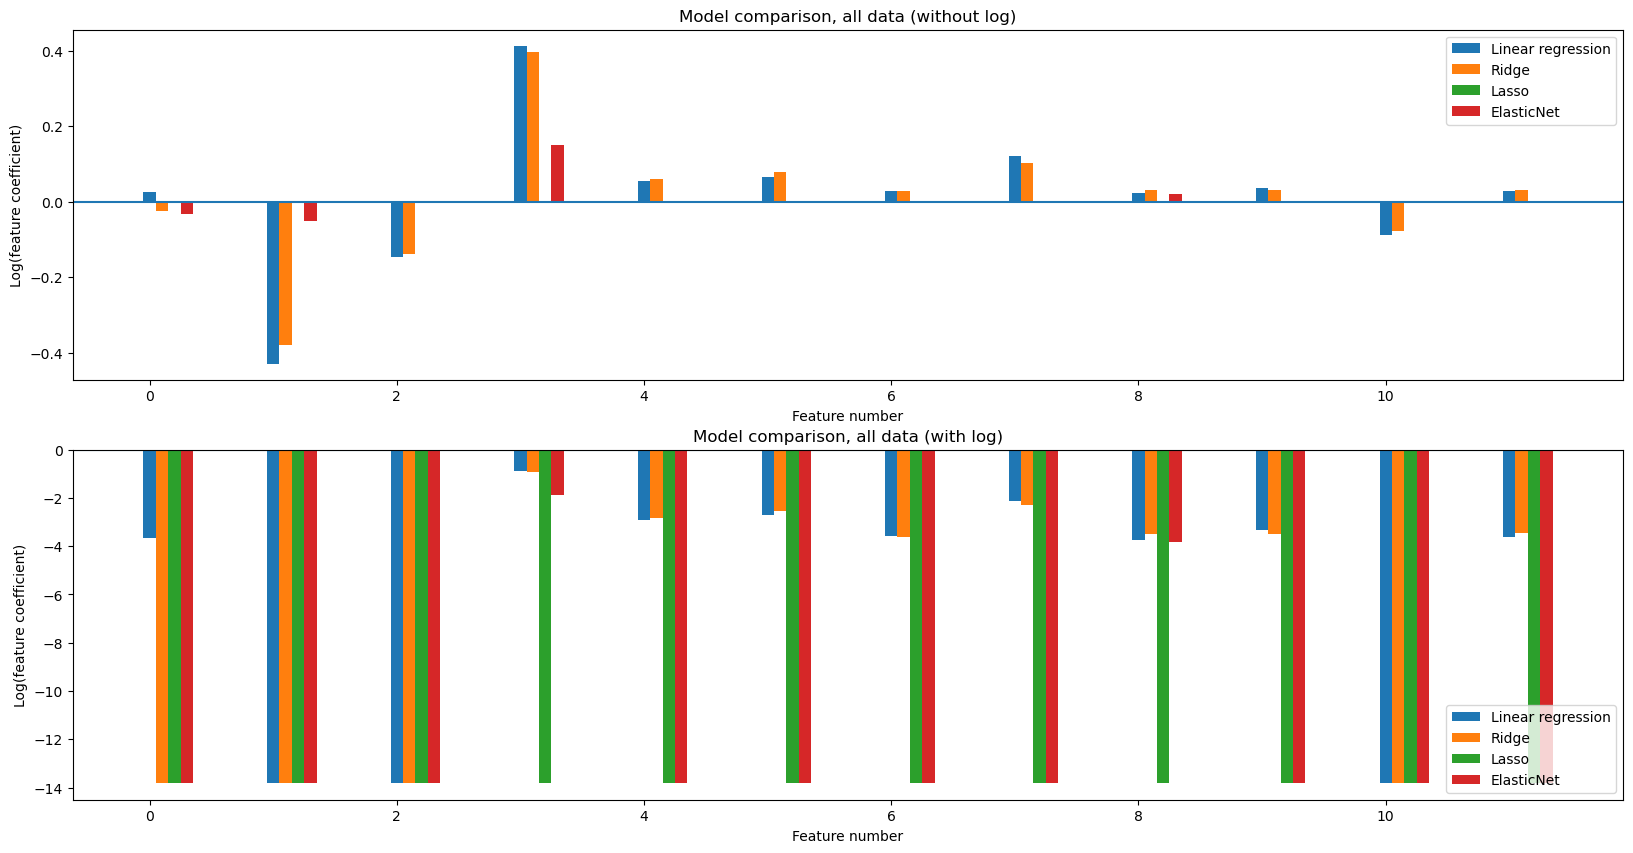

Linear regression MSE: 0.048163275264520536
Ridge MSE: 0.04882183002911054
Lasso MSE: 0.3648704394579209
ElasticNet MSE: 0.23296144763569027
Naive Prediction, predicting mean Nitrate for all: 0.3602249584089299


In [26]:
coef_all1 = check_models(df_specific_big, 1, X_all_train, X_all_test, y_all_train, y_all_test, "Nitrate")

Best option is Ridge with the lowest MSE.

In [27]:
# Coefficients for ridge printed along with their respective column names

features = ["Orthophosphate", "Phosphorus", "Ammonia and ammonium", "Nitrogen, mixed forms (NH3), (NH4), organic, (NO2) and (NO3)", "Silica", "Nitrite",
            'Previous_Nitrogen', 'Previous_Orthophosphate', 'Previous_Phosphorus', 'Previous_Ammonia and ammonium', 'Previous_Silica', 'Previous_Nitrite']

for i in range(len(features)):
    print(features[i] + " Coefficient: " + str(coef_all1[:, 1][i]))

Orthophosphate Coefficient: -0.025973386180813938
Phosphorus Coefficient: -0.38067350812753414
Ammonia and ammonium Coefficient: -0.13770495372582445
Nitrogen, mixed forms (NH3), (NH4), organic, (NO2) and (NO3) Coefficient: 0.3966481338426518
Silica Coefficient: 0.05911101096778898
Nitrite Coefficient: 0.07978588210577686
Previous_Nitrogen Coefficient: 0.027207519390139275
Previous_Orthophosphate Coefficient: 0.10203624836001512
Previous_Phosphorus Coefficient: 0.03036728029501235
Previous_Ammonia and ammonium Coefficient: 0.03018858888786349
Previous_Silica Coefficient: -0.07883860093245862
Previous_Nitrite Coefficient: 0.0321727195016349


Actual Predictions

$$
y_{\text{predicted}} = c + (-0.04086 \cdot x_1) + (-0.35008 \cdot x_2) + (-0.12808 \cdot x_3) + (0.37897 \cdot x_4)
$$

$$
+ (0.12784 \cdot x_5) + (0.18260 \cdot x_6) + (0.04367 \cdot x_7) + (0.07608 \cdot x_8)
$$

$$
+ (0.04584 \cdot x_9) + (0.02201 \cdot x_{10}) + (-0.07209 \cdot x_{11}) + (0.01952 \cdot x_{12})
$$

Where:
- $c$ is the intercept (bias term)
- $x_1 = \text{Orthophosphate}$
- $x_2 = \text{Phosphorus}$
- $x_3 = \text{Ammonia and ammonium}$
- $x_4 = \text{Nitrogen, mixed forms (NH3), (NH4), organic, (NO2) and (NO3)}$
- $x_5 = \text{Silica}$
- $x_6 = \text{Nitrite}$
- $x_7 = \text{Previous\_Nitrogen}$
- $x_8 = \text{Previous\_Orthophosphate}$
- $x_9 = \text{Previous\_Phosphorus}$
- $x_{10} = \text{Previous\_Ammonia and ammonium}$
- $x_{11} = \text{Previous\_Silica}$
- $x_{12} = \text{Previous\_Nitrite}$



In [28]:
# nitrate_pred = []
# for _, row in df_later_predictions.iterrows():
#     predicted_nitrate_level = 0
#     for i in range(len(features)):
#         predicted_nitrate_level += (row[features[i]] * coef_all[:, 1][i])
#     nitrate_pred.append(predicted_nitrate_level)

# df_later_predictions["Predicted Nitrate"] = nitrate_pred

Second analysis -- much bigger

In [29]:
# use:

df_3_vars = df[['ActivityIdentifier', 'Phosphorus', 'Nitrate', 'Sulfate']].dropna(axis = 0)
df_3_vars = df_3_vars.merge(df[['ActivityIdentifier', 'ActivityStartDate', 'ActivityStartTime/Time_PST', 'LongitudeMeasure', 'LatitudeMeasure']], on = "ActivityIdentifier")
df_3_vars

,ActivityIdentifier,Phosphorus,Nitrate,Sulfate,ActivityStartDate,ActivityStartTime/Time_PST,LongitudeMeasure,LatitudeMeasure
0,11NPSWRD_WQX-PRSF_WQ_MTL5_20141202_L^01,0.490000,13.000000,22.00,2014-12-02,NaN,-122.468430,37.788050
1,11NPSWRD_WQX-PRSF_WQ_MTL5_20160106_L^01,0.770000,3.400000,16.00,2016-01-06,NaN,-122.468430,37.788050
2,11NPSWRD_WQX-PRSF_WQ_MTL5_20160322_L^01,0.560000,1.400000,54.00,2016-03-22,11:50:00,-122.468430,37.788050
3,11NPSWRD_WQX-PRSF_WQ_MTL8_20141202_L^01,1.100000,15.000000,160.00,2014-12-02,NaN,-122.465050,37.788870
4,11NPSWRD_WQX-PRSF_WQ_MTL8_20151222_L^01,0.460000,15.000000,170.00,2015-12-22,NaN,-122.465050,37.788870
...,...,...,...,...,...,...,...,...
938,nwisca.01.02303513,0.000023,0.969754,23.20,2023-03-21,12:59:00,-121.769397,37.461603
939,nwisca.01.02303514,0.000064,0.993541,20.70,2023-03-21,16:59:00,-121.769397,37.461603
940,nwisca.01.02303516,0.000144,0.695457,11.00,2023-03-21,00:59:00,-121.769397,37.461603
941,nwisca.01.02303517,0.000179,0.805319,10.10,2023-03-22,04:59:00,-121.769397,37.461603


In [30]:
X1 = df_3_vars.drop(columns=['Nitrate'])
y1 = df_3_vars['Nitrate'] 

In [31]:
X1_train, X1_test, y1_train, y1_test = get_Xy(df_3_vars, 
                                                          ["ActivityStartTime/Time_PST", "LongitudeMeasure", 
                                                           "LatitudeMeasure", "ActivityIdentifier", "ActivityStartDate", "Nitrate"], 
                                                           "Nitrate", 0.3, random_state=41)


/tmp/ipykernel_330/2737601302.py:15: RuntimeWarning: divide by zero encountered in log
  coef_all_log = np.where(coef_all > 0, np.log(coef_all), np.log(1e-6))
/tmp/ipykernel_330/2737601302.py:15: RuntimeWarning: invalid value encountered in log
  coef_all_log = np.where(coef_all > 0, np.log(coef_all), np.log(1e-6))


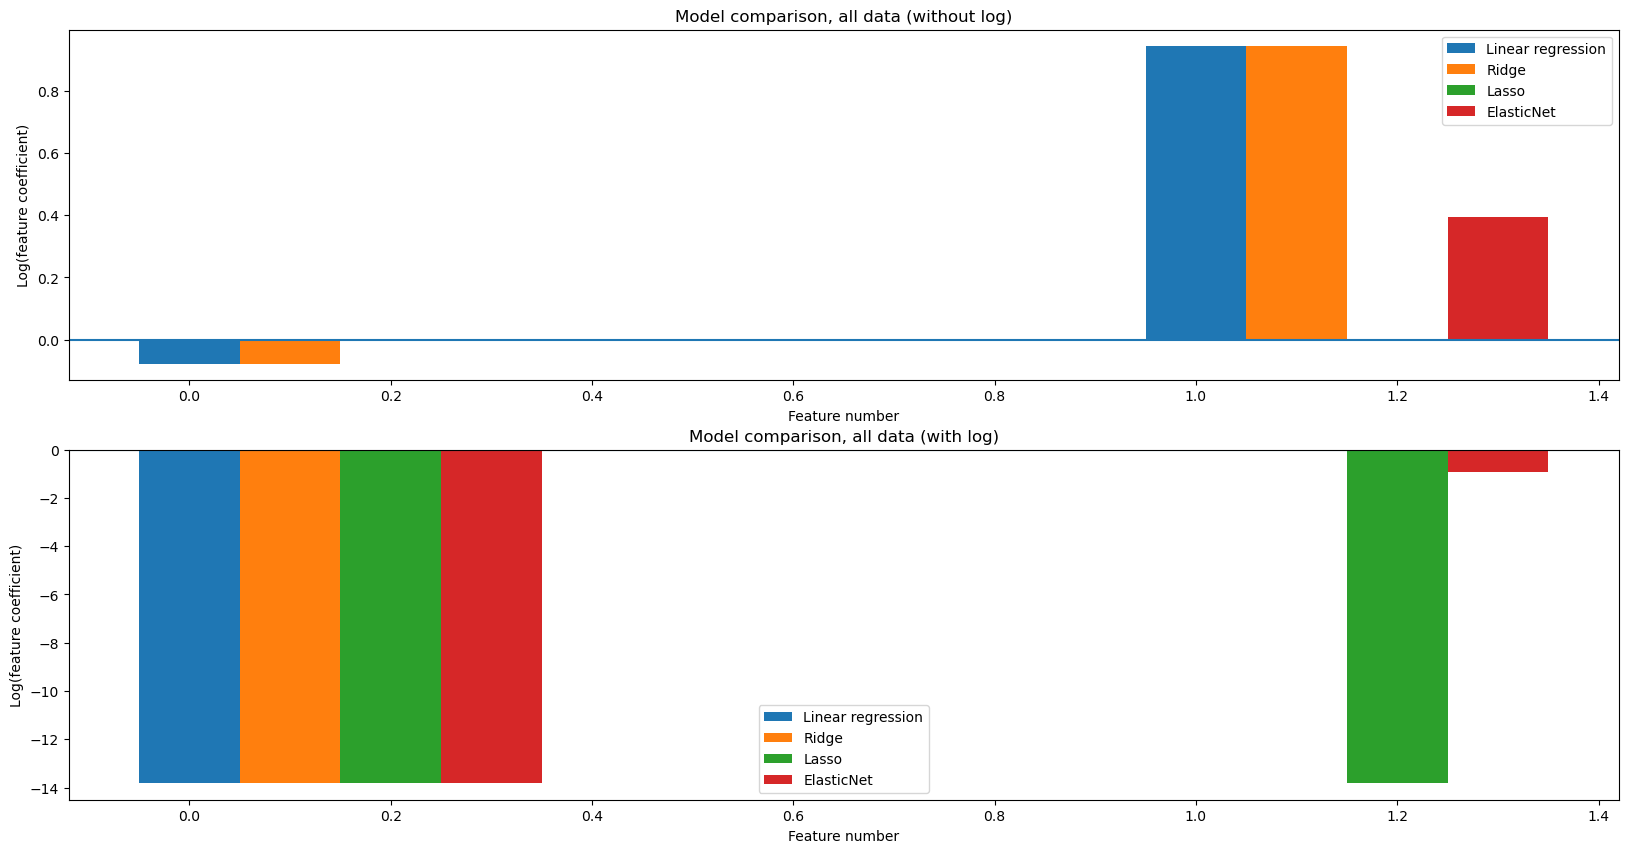

Linear regression MSE: 10.353987517429022
Ridge MSE: 10.351082955535706
Lasso MSE: 10.303523406735392
ElasticNet MSE: 9.943499313352095
Naive Prediction, predicting mean Nitrate for all: 0.3602249584089299


In [32]:
coef_all2 = check_models(df_specific_big, 0.8, X1_train, X1_test, y1_train, y1_test, "Nitrate")

### Attempt 3

In [33]:
df_2 = df[['LongitudeMeasure', 'LatitudeMeasure', 'ActivityStartDate', 'Stream width measure', 'Suspended Sediment Discharge', 'Temperature, water', 'Number of sampling points', 'Turbidity', 'Height, gage', 'Stream flow, instantaneous', 'Suspended Sediment Concentration (SSC)']].dropna(axis = 0)
df_2

,LongitudeMeasure,LatitudeMeasure,ActivityStartDate,Stream width measure,Suspended Sediment Discharge,"Temperature, water",Number of sampling points,Turbidity,"Height, gage","Stream flow, instantaneous",Suspended Sediment Concentration (SSC)
23974,-121.856345,37.540491,2010-12-20,3.84048,0.39,11.2,20.0,15.0,3.130148,0.451534,475004.5
23975,-121.856345,37.540491,2010-12-20,3.84048,0.39,11.2,20.0,15.0,3.130148,0.451534,455004.5
23978,-121.883013,37.626599,2010-10-07,9.14400,1.20,19.0,20.0,36.0,0.522128,0.762277,495008.0
23979,-121.883013,37.626599,2010-10-12,9.14400,0.62,20.1,20.0,28.0,0.490364,0.592326,435005.5
23980,-121.883013,37.626599,2010-10-12,9.14400,0.56,20.1,20.0,28.0,0.490364,0.592326,465005.0
...,...,...,...,...,...,...,...,...,...,...,...
24953,-121.883013,37.626599,2013-04-26,10.66800,2.40,21.5,20.0,20.0,0.289780,0.281584,410044.0
24954,-121.883013,37.626599,2013-04-26,10.66800,2.50,21.5,20.0,20.0,0.289780,0.281584,430045.5
24956,-121.883013,37.626599,2013-04-30,10.66800,1.80,21.5,20.0,19.0,0.281732,0.269505,405035.0
24957,-121.883013,37.626599,2013-04-30,10.66800,1.90,21.5,20.0,19.0,0.281732,0.269505,405037.0


In [34]:
df_2['Previous_Stream_Width'] = df_2.groupby(['LongitudeMeasure', 'LatitudeMeasure'])[
    'Stream width measure'].shift(1)

df_2['Previous_Suspended_Sediment_Discharge'] = df_2.groupby(['LongitudeMeasure', 'LatitudeMeasure'])[
    'Suspended Sediment Discharge'
].shift(1)

df_2['Previous_Temperature_Water'] = df_2.groupby(['LongitudeMeasure', 'LatitudeMeasure'])[
    'Temperature, water'
].shift(1)

df_2['Previous_Turbidity'] = df_2.groupby(['LongitudeMeasure', 'LatitudeMeasure'])[
    'Turbidity'
].shift(1)

df_2['Previous_Height'] = df_2.groupby(['LongitudeMeasure', 'LatitudeMeasure'])[
    'Height, gage'
].shift(1)

df_2['Previous_Stream flow_instantaneous'] = df_2.groupby(['LongitudeMeasure', 'LatitudeMeasure'])[
    'Stream flow, instantaneous'
].shift(1)

df_2['Previous_SSC'] = df_2.groupby(['LongitudeMeasure', 'LatitudeMeasure'])[
    'Suspended Sediment Concentration (SSC)'
].shift(1)

df_2_later_predictions = df_2.iloc[240:]
df_2_specific_big = df_2.iloc[:240]

In [35]:
df_2_specific_big = df_2_specific_big.dropna(axis=0)

In [36]:
new_df = df_2_specific_big[['Temperature, water', 'Suspended Sediment Concentration (SSC)', 'Turbidity', 'Previous_SSC', 'Previous_Temperature_Water', 'Previous_Turbidity']]

In [37]:
new_df

,"Temperature, water",Suspended Sediment Concentration (SSC),Turbidity,Previous_SSC,Previous_Temperature_Water,Previous_Turbidity
23975,11.2,455004.50,15.0,475004.500000,11.2,15.0
23979,20.1,435005.50,28.0,495008.000000,19.0,36.0
23980,20.1,465005.00,28.0,435005.500000,20.1,28.0
23981,16.2,500019.50,30.0,465005.000000,20.1,28.0
23982,16.2,500019.00,30.0,500019.500000,16.2,30.0
...,...,...,...,...,...,...
24947,16.5,745015.25,37.0,663352.333333,16.5,37.0
24948,16.5,745016.50,37.0,745015.250000,16.5,37.0
24949,17.4,335047.00,11.0,745016.500000,16.5,37.0
24950,17.4,340046.00,11.0,335047.000000,17.4,11.0


In [38]:
X2_train, X2_test, y2_train, y2_test = get_Xy(new_df, [], "Turbidity", 0.3, random_state=41)

/tmp/ipykernel_330/2737601302.py:15: RuntimeWarning: divide by zero encountered in log
  coef_all_log = np.where(coef_all > 0, np.log(coef_all), np.log(1e-6))
/tmp/ipykernel_330/2737601302.py:15: RuntimeWarning: invalid value encountered in log
  coef_all_log = np.where(coef_all > 0, np.log(coef_all), np.log(1e-6))


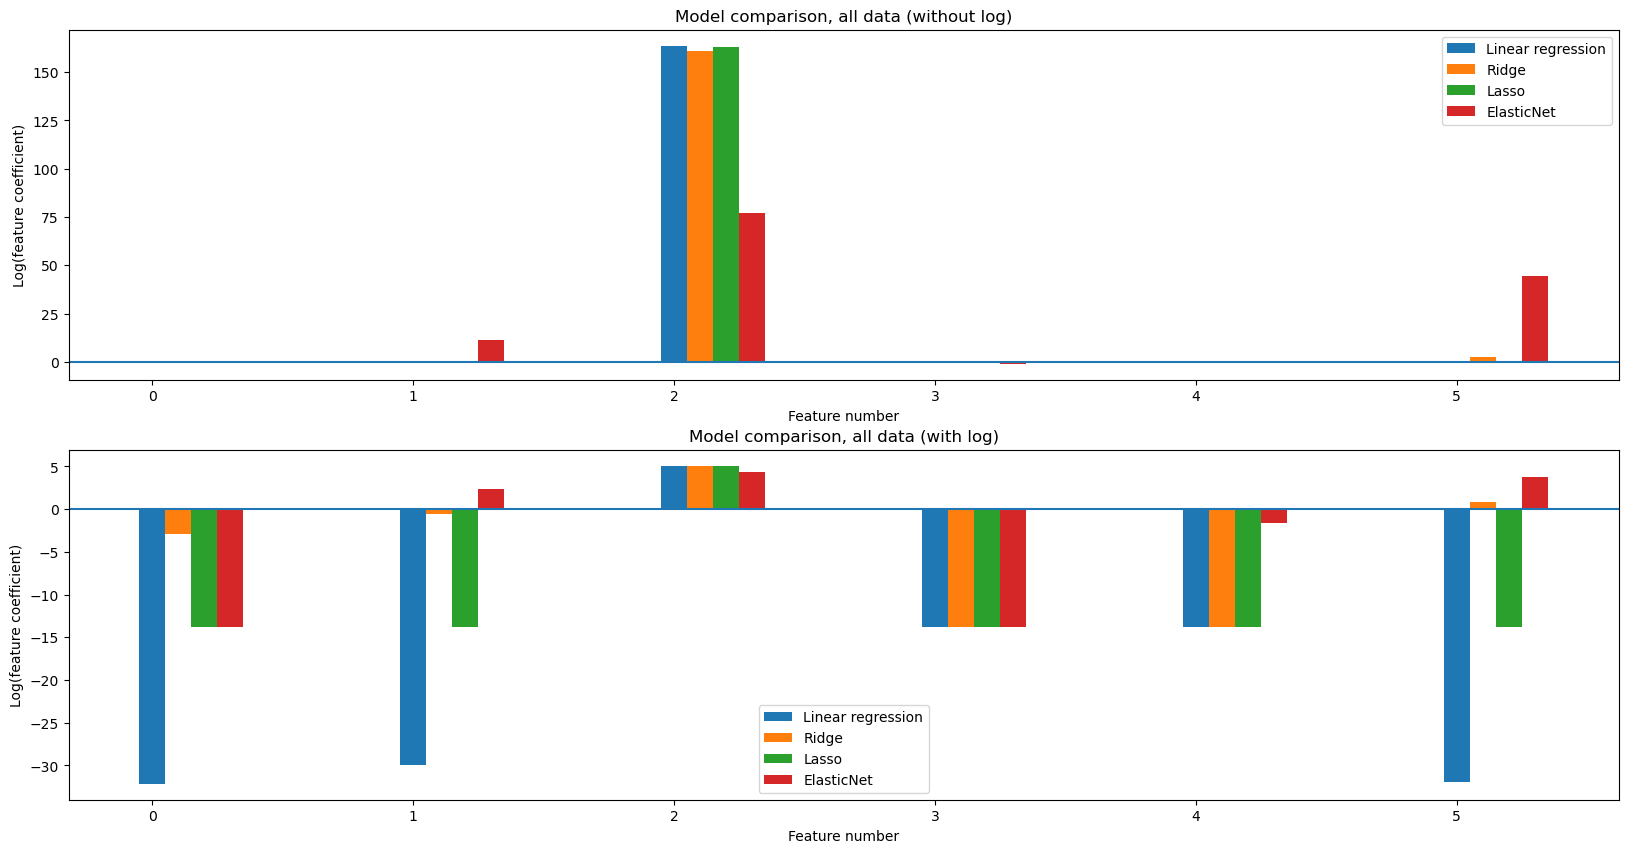

Linear regression MSE: 1.7491711755792864e-26
Ridge MSE: 15.228949370664996
Lasso MSE: 0.6822316792566058
ElasticNet MSE: 10958.640157901078
Naive Prediction, predicting mean Turbidity for all: 25878.549592834952


In [39]:
coef_all2 = check_models(df_2, 0.6, X2_train, X2_test, y2_train, y2_test, "Turbidity")

In [40]:
# Coefficients for ridge printed along with their respective column names

features = ['Temperature, water', 'Suspended Sediment Concentration (SSC)', 'Turbidity', 'Previous_SSC', 'Previous_Temperature_Water', 'Previous_Turbidity']

for i in range(len(features)):
    print(features[i] + " Coefficient: " + str(coef_all2[:, 1][i]))

Temperature, water Coefficient: 0.052478206629278594
Suspended Sediment Concentration (SSC) Coefficient: 0.5392231774149001
Turbidity Coefficient: 160.92427241015767
Previous_SSC Coefficient: -0.3792310490127412
Previous_Temperature_Water Coefficient: -0.0029331912167005736
Previous_Turbidity Coefficient: 2.408773879645213
